In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- dataやlogsをdownloadした後のD-NeRFリポジトリ

In [4]:
cd /content/drive/MyDrive/WM/0328/D-NeRF

/content/drive/MyDrive/WM/0328/D-NeRF


In [5]:
ls

configs/         metrics.ipynb      render.ipynb          torchsearchsorted/
data/            __pycache__/       requirements.txt      zip/
load_blender.py  README.md          run_dnerf_helpers.py
logs/            reconstruct.ipynb  run_dnerf.py


In [ ]:
!pip install -r requirements.txt

In [7]:
cd torchsearchsorted

/content/drive/MyDrive/WM/0328/D-NeRF/torchsearchsorted


In [8]:
ls

examples/  LICENSE  README.md  setup.py  src/  test/


In [9]:
!python setup.py

usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


In [10]:
!pip install .

Processing /content/drive/MyDrive/WM/0328/D-NeRF/torchsearchsorted
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for torchsearchsorted: filename=torchsearchsorted-1.1-cp37-cp37m-linux_x86_64.whl size=4312913 sha256=c386338dc70b1ee108cdfe452e6e383e4eb236159b2033d8774a60fa09136acc
  Stored in directory: /tmp/pip-ephem-wheel-cache-k34i2sym/wheels/66/64/a2/1daf79f14a2964ceb5179d57b6e800036ea916a4c38e2d74a6
Successfully built torchsearchsorted


In [11]:
cd ..

/content/drive/MyDrive/WM/0328/D-NeRF


# 以下，元のコード

In [12]:
from run_dnerf import config_parser, create_nerf
import matplotlib.pyplot as plt
import torch
from load_blender import pose_spherical
from run_dnerf import render_path
from run_dnerf_helpers import to8b

In [13]:
# set cuda
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# get config file
config_file = "configs/mutant.txt"
parser = config_parser()
args = parser.parse_args(f'--config {config_file}')

# set render params
hwf = [400, 400, 555.555]
_, render_kwargs_test, _, _, _ = create_nerf(args)
render_kwargs_test.update({'near' : 2., 'far' : 6.})

NeRF type selected: direct_temporal
Found ckpts ['./logs/mutant/800000.tar']
Reloading from ./logs/mutant/800000.tar


## Generate Frame

In [14]:
def generate_img(time, azimuth, elevation):
    assert 0. <= time <= 1.
    assert -180 <= azimuth <= 180
    assert -180 <= elevation <= 180
    
    render_poses = torch.unsqueeze(pose_spherical(azimuth, elevation, 4.0), 0).to(device)
    render_times = torch.Tensor([time]).to(device)

    with torch.no_grad():
            rgbs, _ = render_path(render_poses, render_times, hwf, args.chunk, render_kwargs_test, render_factor=args.render_factor)
    rgbs = to8b(rgbs)
    return rgbs[0]

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 1/1 [00:37<00:00, 37.73s/it]


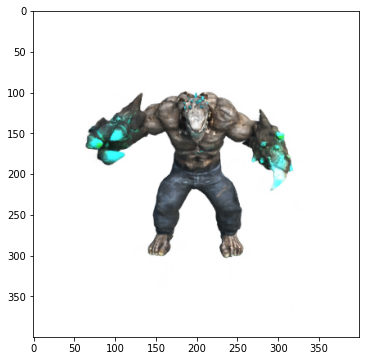

In [15]:
# genearte
time = .5  # in [0,1]
azimuth = 180  # in [-180,180]
elevation = -20  # in [-180,180]
img = generate_img(time, azimuth, elevation)

# display
plt.figure(2, figsize=(20,6))
plt.imshow(img)
plt.show()